# Melhorar performance -> Regressão Linear

In [20]:
import pandas as pd
market = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
market.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [21]:
#Selecionando só duas colunas das variáveis independentes.
x = market[['TV', 'radio']]
y = market['sales']

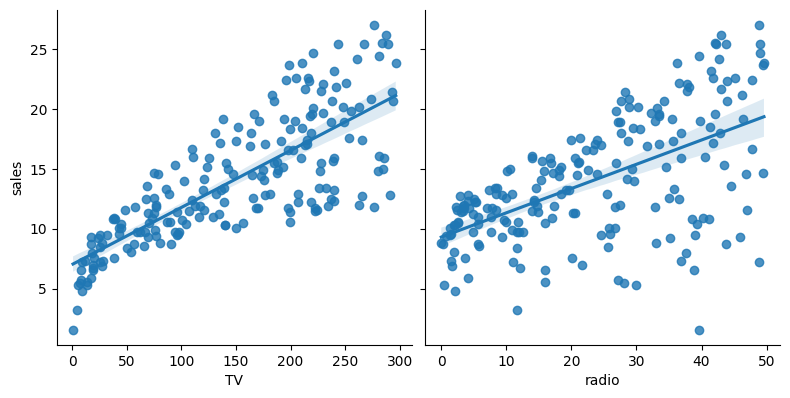

In [22]:
#Aparentemente, o pairplot plota todas as combinações possíveis, caso não haja parâmetros no x_vars e y_vars.
import seaborn as sns
sns.pairplot(market,x_vars=['TV', 'radio'], y_vars = 'sales', height=4, kind='reg')

#### Separando dados para o treino e testes

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)


#### Treinando...

In [24]:
from sklearn.linear_model import LinearRegression
t_tr = LinearRegression()
t_tr.fit(x_train, y_train)

LinearRegression()

#### Avaliando...

In [25]:
#Coeficientes...
t_tr.coef_

array([0.04685386, 0.18792746])

In [26]:
#Previsões dado x_test
y_prev = t_tr.predict(x_test)

#Avaliação com base no RMSE: Root mean squared error -> acha a diferença dos erros, resposta certa x resposta prevista,
#eleva ao quadrado e acha a raiz para enfatizar todos os erros

import numpy as np
from sklearn import metrics

print('Primeiro resultado, avaliação entre o market TV e Rádio, erro de',round(np.sqrt(metrics.mean_squared_error(y_test, y_prev)),2),'de variação.')


Primeiro resultado, avaliação entre o market TV e Rádio, erro de 1.57 de variação.


#### Avaliando o market da TV e Jornal

In [27]:
x = market[['TV', 'newspaper']]

#separando dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

#treinando a máquina
t_tr = LinearRegression()
t_tr.fit(x_train, y_train)

#previsao
y_prev = t_tr.predict(x_test)

#avaliação

print('Segundo resultado, avaliação entre o market TV e Jornal, erro de',round(np.sqrt(metrics.mean_squared_error(y_test, y_prev)),2),'de variação.')




Segunda resultado, avaliação entre o market TV e Jornal, erro de 2.87 de variação.


#### Avaliando o market do Rádio e Jornal

In [28]:
x = market[['radio', 'newspaper']]

#separando dados
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

#treinando a máquina
t_tr = LinearRegression()
t_tr.fit(x_train, y_train)

#previsao
y_prev = t_tr.predict(x_test)

#avaliação

print('Terceiro resultado, avaliação entre o market Radio e Jornal, erro de',round(np.sqrt(metrics.mean_squared_error(y_test, y_prev)),2),'de variação.')


Terceira resultado, avaliação entre o market Radio e Jornal, erro de 4.01 de variação.
